In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls '/content/drive/MyDrive/Abo Akademi data science'

'caloris distribution.pdf'  'points distributions.pdf'	    'recipe urls.csv'
 MP2_Data.csv		    'recipe keys distribution.pdf'   skinnytaste_recipe_info.csv


In [4]:
import os
os.chdir("/content/drive/MyDrive/Abo Akademi data science")

In [5]:
# Load the dataset
file_path = 'MP2_Data.csv'  # Change this to your file path if needed
data = pd.read_csv(file_path)
data

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,ML-2020-1,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,...,0,5,4,0,4,8,6,1,0,4
1,ML-2020-2,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,...,8,5,2,0,0,25,3,2,5,4
2,ML-2020-3,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,...,0,8,2,0,0,9,0,1,0,3
3,ML-2020-4,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,...,4,10,0,0,0,7,6,0,0,3
4,ML-2020-6,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,...,6,8,5,1,1,5,3,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,ML-2020-60,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,...,0,28,0,22,0,1,0,0,0,0
103,ML-2020-58,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,...,0,0,0,0,0,3,0,0,0,0
104,ML-2020-94,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,...,0,0,0,0,0,0,0,0,0,0
105,ML-2020-9,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,...,0,0,0,0,0,6,0,0,0,0


In [6]:
# Step 1: Data Processing
# Drop the 'ID' column as it's not needed for predictions
data_cleaned = data.drop(columns=['ID'])

In [7]:
data_cleaned

,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,82.97,...,0,5,4,0,4,8,6,1,0,4
1,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,82.43,...,8,5,2,0,0,25,3,2,5,4
2,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,79.44,...,0,8,2,0,0,9,0,1,0,3
3,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,80.65,...,4,10,0,0,0,7,6,0,0,3
4,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,67.68,...,6,8,5,1,1,5,3,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,...,0,28,0,22,0,1,0,0,0,0
103,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,...,0,0,0,0,0,3,0,0,0,0
104,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,...,0,0,0,0,0,0,0,0,0,0
105,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,...,0,0,0,0,0,6,0,0,0,0


In [8]:
# Define the features (all columns except 'Grade') and the target (final grade)
X = data_cleaned.drop(columns=['Grade'])
y = data_cleaned['Grade']

In [9]:
# Step 2: Data Split (Training and Testing)
# Split the dataset: 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Step 3: Model Training
# Initialize the models
lin_reg = LinearRegression()
rf_reg = RandomForestRegressor(random_state=42)

# Train the models
lin_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [11]:
# Make predictions on the test set
y_pred_lin_reg = lin_reg.predict(X_test)
y_pred_rf_reg = rf_reg.predict(X_test)

# Step 4: Performance Evaluation
# Evaluate the models using Mean Squared Error (MSE) and R-squared (R²)
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)

mse_rf_reg = mean_squared_error(y_test, y_pred_rf_reg)
r2_rf_reg = r2_score(y_test, y_pred_rf_reg)

In [12]:
# Print out model performance
print("Linear Regression Performance:")
print(f"MSE: {mse_lin_reg}, R²: {r2_lin_reg}")
print("\nRandom Forest Performance:")
print(f"MSE: {mse_rf_reg}, R²: {r2_rf_reg}")


Linear Regression Performance:
MSE: 0.9177101994409885, R²: 0.7819480920326762

Random Forest Performance:
MSE: 0.047654545454545456, R²: 0.9886770741286205


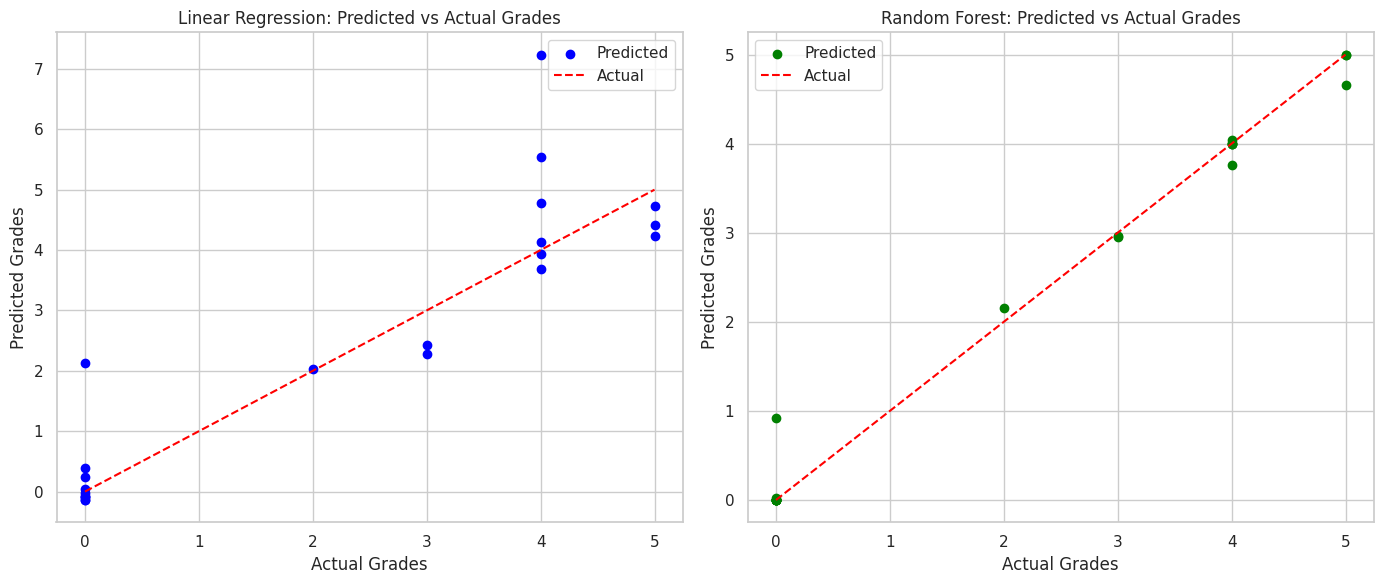

In [17]:
# Step 5: Visualization of Predicted vs Actual Grades

# Set plot style
sns.set(style="whitegrid")

# Create a figure with subplots
plt.figure(figsize=(14, 6))

# Plot Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lin_reg, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Actual', linestyle='--')
plt.title('Linear Regression: Predicted vs Actual Grades')
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.legend()

# Plot Random Forest Regressor
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf_reg, color='green', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Actual', linestyle='--')
plt.title('Random Forest: Predicted vs Actual Grades')
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

In [24]:
# Step 6: Feature Importance (for Random Forest)
# Extract feature importance from the Random Forest model
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_reg.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importances = feature_importances.drop([9])

print(feature_importances)

        Feature  Importance
3     Week5_MP2    0.259435
5     Week7_MP3    0.197750
4     Week5_PR2    0.062677
2     Week3_PR1    0.052598
1     Week3_MP1    0.018049
6     Week7_PR3    0.000501
27  Week5_Stat1    0.000407
39  Week8_Stat1    0.000406
42  Week9_Stat0    0.000273
26  Week5_Stat0    0.000242
30  Week6_Stat0    0.000076
8   Week6_Quiz3    0.000056
34  Week7_Stat0    0.000000
29  Week5_Stat3    0.000000
44  Week9_Stat2    0.000000
31  Week6_Stat1    0.000000
32  Week6_Stat2    0.000000
33  Week6_Stat3    0.000000
35  Week7_Stat1    0.000000
43  Week9_Stat1    0.000000
36  Week7_Stat2    0.000000
37  Week7_Stat3    0.000000
38  Week8_Stat0    0.000000
28  Week5_Stat2    0.000000
40  Week8_Stat2    0.000000
41  Week8_Stat3    0.000000
0   Week2_Quiz1    0.000000
23  Week4_Stat1    0.000000
25  Week4_Stat3    0.000000
15  Week2_Stat1    0.000000
7   Week4_Quiz2    0.000000
10  Week1_Stat0    0.000000
11  Week1_Stat1    0.000000
12  Week1_Stat2    0.000000
13  Week1_Stat3    0

In [25]:
# Print the top 3 most important features
print("\nTop 3 most important features in predicting final grade:")
print(feature_importances.head(3))


Top 3 most important features in predicting final grade:
     Feature  Importance
3  Week5_MP2    0.259435
5  Week7_MP3    0.197750
4  Week5_PR2    0.062677
